In [98]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [99]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [100]:
NUM_CLASSES = 26

# Dataset reading

In [101]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [102]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [104]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [105]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [107]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [108]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
68/70 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.0576 - loss: 3.2888 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0581 - loss: 3.2873 - val_accuracy: 0.1187 - val_loss: 3.1718
Epoch 2/1000
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0703 - loss: 3.2106
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0933 - loss: 3.1694 - val_accuracy: 0.1011 - val_loss: 3.0212
Epoch 3/1000
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1250 - loss: 3.0510
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1148 - loss: 3.0338 - val_accuracy: 0.1805 - val_loss: 2.8322
Epoch 4/1000
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1328 - loss: 2.9004
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [109]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7867 - loss: 0.8680


In [110]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [111]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[1.52507588e-01 3.75101529e-03 4.16965559e-02 2.03013630e-03
 1.20771267e-02 3.29188891e-02 2.04529217e-03 5.53162722e-03
 4.31851600e-04 2.33405340e-03 1.27239926e-02 2.27312986e-02
 2.36766269e-08 1.48483963e-08 3.23747583e-02 4.54199314e-03
 8.10829625e-02 7.76873057e-05 4.90404367e-01 3.92168388e-03
 1.46500338e-13 3.27787042e-08 2.02085200e-19 9.64611843e-02
 3.55747790e-04 1.11862725e-07]
18


# Confusion matrix

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step


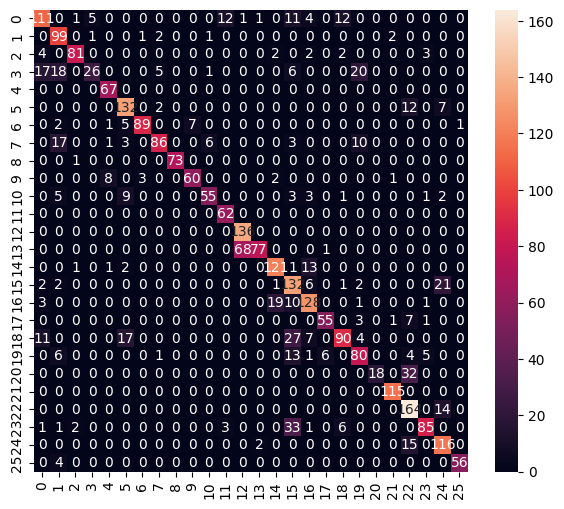

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       158
           1       0.64      0.93      0.76       106
           2       0.94      0.86      0.90        94
           3       0.81      0.28      0.42        93
           4       0.86      1.00      0.92        67
           5       0.79      0.86      0.82       153
           6       0.96      0.85      0.90       105
           7       0.90      0.68      0.77       126
           8       1.00      0.99      0.99        74
           9       0.90      0.81      0.85        74
          10       0.87      0.70      0.77        79
          11       0.81      1.00      0.89        62
          12       0.66      1.00      0.80       136
          13       0.96      0.53      0.68       146
          14       0.83      0.87      0.85       139
          15       0.55      0.79      0.65       167
          16       0.78      0.79      0.78       162
     

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [113]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [114]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp4ni3r2dg\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp4ni3r2dg\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmp4ni3r2dg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1441737914128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1441737909904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1441737912976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1441737914512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1441776458576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1441776451664: TensorSpec(shape=(), dtype=tf.resource, name=None)


7524

# Inference test

In [115]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [116]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [117]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [119]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [120]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5250742e-01 3.7510220e-03 4.1696526e-02 2.0301351e-03 1.2077130e-02
 3.2918908e-02 2.0452931e-03 5.5316291e-03 4.3185177e-04 2.3340520e-03
 1.2724001e-02 2.2731312e-02 2.3676636e-08 1.4848428e-08 3.2374758e-02
 4.5419992e-03 8.1082880e-02 7.7687262e-05 4.9040455e-01 3.9216857e-03
 1.4650038e-13 3.2778715e-08 2.0208449e-19 9.6461244e-02 3.5574794e-04
 1.1186276e-07]
18
